<a href="https://colab.research.google.com/github/Tanishqk96/Agentic-ai/blob/main/voting_and_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [23]:
x,y= make_moons(n_samples=1000, noise=0.2)

In [41]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [44]:
dataset = pd.DataFrame(df)

In [43]:
|dataset

,x1,x2
0,-0.344312,0.689099
1,-0.617535,0.593690
2,-0.704918,0.831548
3,0.858192,-0.281110
4,0.217212,1.409661
...,...,...
995,2.069121,-0.475486
996,-0.196974,0.854620
997,-0.979514,0.156516
998,0.658140,0.727998


<Axes: xlabel='x1', ylabel='x2'>

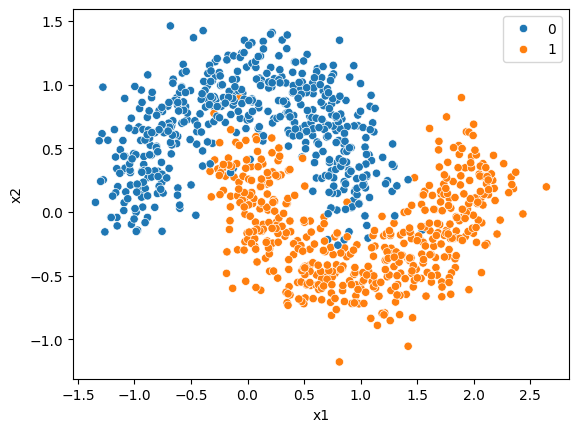

In [45]:
sns.scatterplot(x="x1",y="x2", data=dataset,hue=y)

In [46]:
x_a = dataset.iloc[:,:-1]

In [47]:
y_a = dataset["y"]

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a,test_size=0.2, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_test, y_test))
print(dt.score(x_train, y_train))

0.95
1.0


In [52]:
svc = SVC()
svc.fit(x_train, y_train)
print(svc.score(x_test, y_test))
print(svc.score(x_train, y_train))

0.96
0.97375


In [53]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print(gnb.score(x_test, y_test))
print(gnb.score(x_train, y_train))

0.85
0.8725


In [55]:
from sklearn.ensemble import VotingClassifier
li=[("dtc",DecisionTreeClassifier()),("svc1", SVC()),("gnb1",GaussianNB())]

In [65]:
vi = VotingClassifier(li, weights=(7,10,4))

In [66]:
vi.fit(x_train, y_train)

VotingClassifier(estimators=[('dtc', DecisionTreeClassifier()), ('svc1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=(7, 10, 4))

In [67]:
print(vi.score(x_test, y_test))
print(vi.score(x_train, y_train))

0.95
0.97875


***BAGGING***

In [68]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [80]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=10)

In [81]:
bg.fit(x_train, y_train)


BaggingClassifier(estimator=SVC())

In [82]:
bg.score(x_test, y_test), bg.score(x_train, y_train)

(0.96, 0.975)

In [83]:
rf= RandomForestClassifier(n_estimators=49)
rf.fit(x_train, y_train)
rf.score(x_test, y_test), rf.score(x_train, y_train)

(0.955, 1.0)